In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('next_process.csv')
data

,qty,total_price,freight_price,unit_price,customers,s,comp_1,comp_2,comp_3,lag_price,product_category_name_encoded
0,1,45.95,15.100000,45.950000,57,10.267394,89.9,215.000000,45.95,45.900000,0
1,3,137.85,12.933333,45.950000,61,6.503115,89.9,209.000000,45.95,45.950000,0
2,6,275.70,14.840000,45.950000,123,12.071651,89.9,205.000000,45.95,45.950000,0
3,4,183.80,14.287500,45.950000,90,9.293873,89.9,199.509804,45.95,45.950000,0
4,2,91.90,15.100000,45.950000,54,5.555556,89.9,163.398710,45.95,45.950000,0
...,...,...,...,...,...,...,...,...,...,...,...
671,1,215.00,8.760000,215.000000,57,0.649351,89.9,215.000000,45.95,214.950000,0
672,10,2090.00,21.322000,209.000000,61,6.493506,89.9,209.000000,45.95,215.000000,0
673,59,12095.00,22.195932,205.000000,123,38.311688,89.9,205.000000,45.95,209.000000,0
674,52,10375.00,19.412885,199.509804,90,33.766234,89.9,199.509804,45.95,205.000000,0


In [5]:
data.skew()

qty                              2.673537
total_price                      2.613959
freight_price                    1.845973
unit_price                       1.778753
customers                        1.402722
s                                2.412168
comp_1                           1.368864
comp_2                           1.637614
comp_3                           1.218799
lag_price                        1.732439
product_category_name_encoded   -0.409085
dtype: float64

In [6]:
data.kurt()

qty                              10.252170
total_price                       9.044129
freight_price                     4.492303
unit_price                        3.081719
customers                         3.140059
s                                 9.144509
comp_1                            4.412291
comp_2                            5.176590
comp_3                            0.684258
lag_price                         2.848949
product_category_name_encoded    -0.835815
dtype: float64

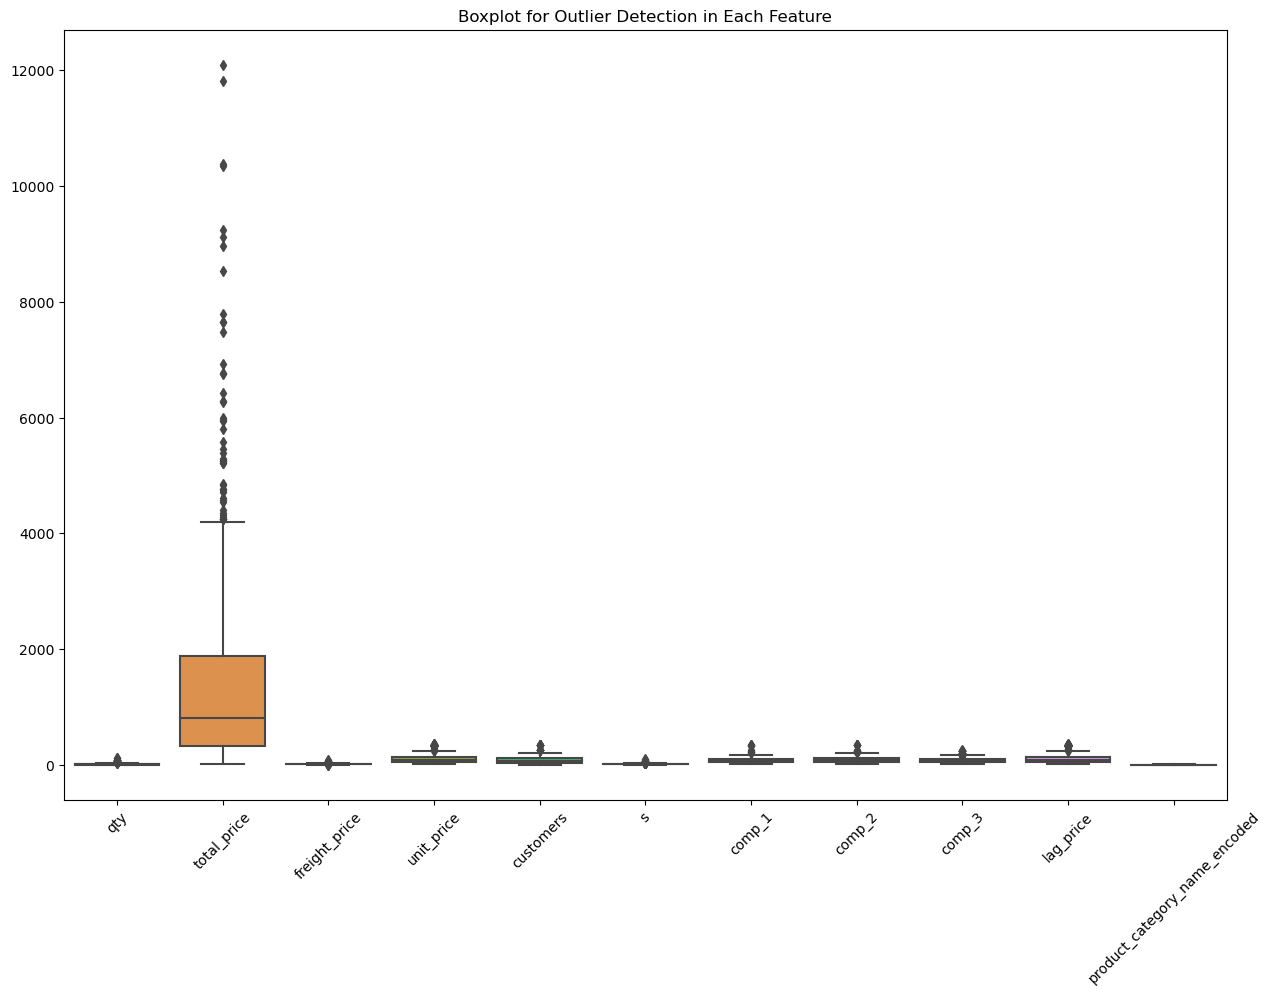

In [7]:
# Plot boxplots to visually inspect for outliers in each feature
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection in Each Feature")
plt.show()


In [8]:
# Outlier detection using IQR method
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier counts for each column
outlier_counts = {}

for col in numerical_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

# Display outlier counts for each column
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
print("Outlier Counts for Each Column:")
print(outlier_counts_df)

Outlier Counts for Each Column:
                           Column  Outlier Count
0                             qty             42
1                     total_price             46
2                   freight_price             76
3                      unit_price             45
4                       customers             18
5                               s             53
6                          comp_1              9
7                          comp_2             17
8                          comp_3             58
9                       lag_price             45
10  product_category_name_encoded              0


In [9]:
# Calculate the correlation matrix of the dataset
correlation_matrix = data.corr()

# Show the correlation matrix
correlation_matrix

,qty,total_price,freight_price,unit_price,customers,s,comp_1,comp_2,comp_3,lag_price,product_category_name_encoded
qty,1.000000,0.749605,-0.135521,-0.103432,0.441547,0.411001,-0.033570,-0.027044,-0.068522,-0.085885,-0.050217
total_price,0.749605,1.000000,0.025848,0.409001,0.386389,0.334500,0.144426,0.203050,0.121114,0.426256,0.033230
freight_price,-0.135521,0.025848,1.000000,0.203659,0.088261,-0.109359,-0.013969,-0.084208,-0.089285,0.201143,-0.057583
unit_price,-0.103432,0.409001,0.203659,1.000000,0.043391,-0.016552,0.317113,0.466459,0.383780,0.994453,0.257830
customers,0.441547,0.386389,0.088261,0.043391,1.000000,0.214383,-0.177735,-0.142704,-0.115673,0.056988,0.248260
s,0.411001,0.334500,-0.109359,-0.016552,0.214383,1.000000,0.058075,0.016726,0.020775,-0.002993,-0.047425
comp_1,-0.033570,0.144426,-0.013969,0.317113,-0.177735,0.058075,1.000000,0.532859,0.650433,0.322348,-0.083843
comp_2,-0.027044,0.203050,-0.084208,0.466459,-0.142704,0.016726,0.532859,1.000000,0.472245,0.465271,0.003144
comp_3,-0.068522,0.121114,-0.089285,0.383780,-0.115673,0.020775,0.650433,0.472245,1.000000,0.385621,0.437958
lag_price,-0.085885,0.426256,0.201143,0.994453,0.056988,-0.002993,0.322348,0.465271,0.385621,1.000000,0.258267


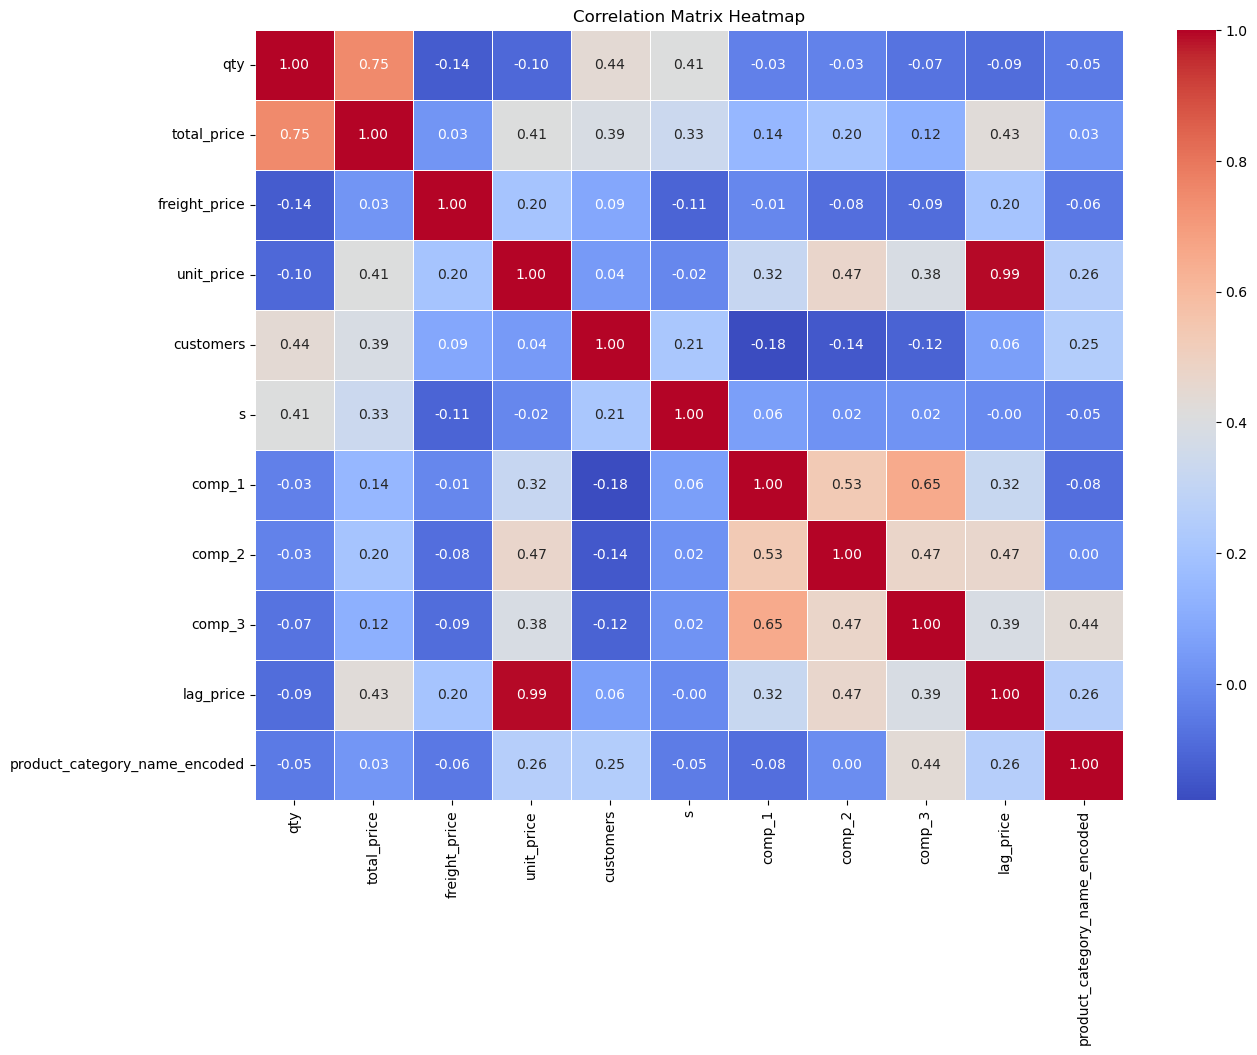

In [10]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Suggested Outlier Handling Approaches

In [11]:
data.skew()

qty                              2.673537
total_price                      2.613959
freight_price                    1.845973
unit_price                       1.778753
customers                        1.402722
s                                2.412168
comp_1                           1.368864
comp_2                           1.637614
comp_3                           1.218799
lag_price                        1.732439
product_category_name_encoded   -0.409085
dtype: float64

In [12]:
data = np.log1p(data)
data.skew()

qty                             -0.008338
total_price                     -0.252669
freight_price                   -0.570525
unit_price                       0.100453
customers                       -0.805320
s                               -0.123254
comp_1                          -0.315580
comp_2                          -0.161331
comp_3                           0.332942
lag_price                        0.077748
product_category_name_encoded   -1.262518
dtype: float64

## Interpreting Skewness After Log Transformation
- Positive Skew Reduction:

  - For features that were initially right-skewed (positive skewness), the log transformation compresses larger values and brings the distribution closer to a normal shape.
  - Skewness values closer to zero indicate that the transformation successfully normalized the feature’s distribution.
- Handling Extreme Positive Skew:

  - If some features still show a high positive skew after the transformation, it could mean they had extreme outliers that the log transformation could not fully normalize.
  - In such cases, consider alternative treatments (e.g., Winsorization, which caps extreme values).
- Negative Skew:

  - For features that initially had a negative skew, the log transformation may slightly increase the skew due to compressing high values. If the skew remains high, it may suggest that these features don’t need a log transformation or might benefit from a different approach (e.g., a cube root transformation).

In [13]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = data.drop('unit_price',axis=1)  # Assuming 'qty' is the target variable for demand prediction
y = data['unit_price']

# Splitting data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Define model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


# Calculate feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

RMSE: 0.061706320242587445
R² Score: 0.9914727031494711
Feature Importances:
                         Feature  Importance
8                      lag_price    0.989132
7                         comp_3    0.003856
5                         comp_1    0.001976
6                         comp_2    0.001501
2                  freight_price    0.000941
3                      customers    0.000642
4                              s    0.000611
0                            qty    0.000566
1                    total_price    0.000520
9  product_category_name_encoded    0.000255


In [15]:
# Define a function to calculate the optimized price for each row using grid search
def grid_search_optimize_price_for_row(row):
    # Set the row's specific cost and quantity sold
    cost = row['freight_price']
    qty = row['qty']
    
    # Define a range for unit_price starting just above the cost to avoid negative profit
    price_range = np.linspace(cost + 0.01, cost + 50, 100)
    
    # Calculate profit for each price in the range
    profits = [(price - cost) * qty for price in price_range]
    
    # Find the price that yields the maximum profit
    optimal_price = price_range[np.argmax(profits)]
    return optimal_price

# Apply the grid search optimization to each row to create an 'optimized_price' column
data['optimized_price'] = data.apply(grid_search_optimize_price_for_row, axis=1)

# Calculate the profit for each row using the row-specific optimized prices
data['calculated_profit'] = (data['optimized_price'] - data['freight_price']) * data['qty']

# Display the first few rows to confirm the optimized prices and calculated profits
data[['unit_price', 'optimized_price', 'freight_price', 'qty', 'calculated_profit']].head()

,unit_price,optimized_price,freight_price,qty,calculated_profit
0,3.849083,52.778819,2.778819,0.693147,34.657359
1,3.849083,52.634284,2.634284,1.386294,69.314718
2,3.849083,52.762538,2.762538,1.945910,97.295507
3,3.849083,52.727036,2.727036,1.609438,80.471896
4,3.849083,52.778819,2.778819,1.098612,54.930614


In [16]:
# Assuming `df` is your DataFrame
data.to_csv('set_optimal_price.csv', index=False)